In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
aggregation_time_frame = 60 * 30 # 1h
dfs = []

for omega in (15, 25, 50, 100):
    df = pd.read_csv(f"/export/share/markusz33dm/logs/graph-size_{omega}.csv")
    df["time_seconds"] = df["time_seconds"] - df["time_seconds"].min()
    df = df.set_index("time_seconds")

    # Normalize the index relative to its first value
    # print(df.index)

    # Compute node_edge_difference before setting the MultiIndex
    df["graph_density"] = df["number_of_edges"] / (df["number_of_nodes"] * (df["number_of_nodes"] - 1))

    df.columns = pd.MultiIndex.from_product([[omega], df.columns])

    dfs.append(df)

# Concatenating while preserving the order of columns
data_frame = pd.concat(dfs, axis=1).sort_index(axis=1)
data_frame = data_frame.swaplevel(0, 1, axis=1)
data_frame["minute"] = data_frame.index // 60
data_frame

,graph_density,interval_length_delta,iterations_rate,iterations_total,memory_usage_bytes,number_of_edges,number_of_nodes,seed_interval_length,graph_density,interval_length_delta,...,seed_interval_length,graph_density,interval_length_delta,iterations_rate,iterations_total,memory_usage_bytes,number_of_edges,number_of_nodes,seed_interval_length,minute
,15,15,15,15,15,15,15,15,25,25,...,50,100,100,100,100,100,100,100,100,
time_seconds,,,,,,,,,,,,,,,,,,,,,
0.000000,1.5,0.0,3061.809854,18410.0,1.805472e+09,3.0,2.0,8.0,1.5,0.0,...,8.0,0.055336,0.0,2244.496546,12947.0,1.788989e+09,28.0,23.0,62.0,0.0
0.851429,1.5,0.0,11750.364909,80657.0,1.805480e+09,3.0,2.0,14.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
0.926225,1.5,0.0,12399.897693,86043.0,1.805480e+09,3.0,2.0,15.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2.575701,1.5,0.0,14555.652825,125011.0,1.805480e+09,3.0,2.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3.174220,2.0,0.0,18420.151412,169226.0,1.805480e+09,4.0,2.0,13.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392845.783390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.121212,0.0,263.941057,103689654.0,1.260685e+10,16.0,12.0,90.0,6547.0
392935.852569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.127273,0.0,263.888981,103692964.0,1.260685e+10,14.0,11.0,75.0,6548.0


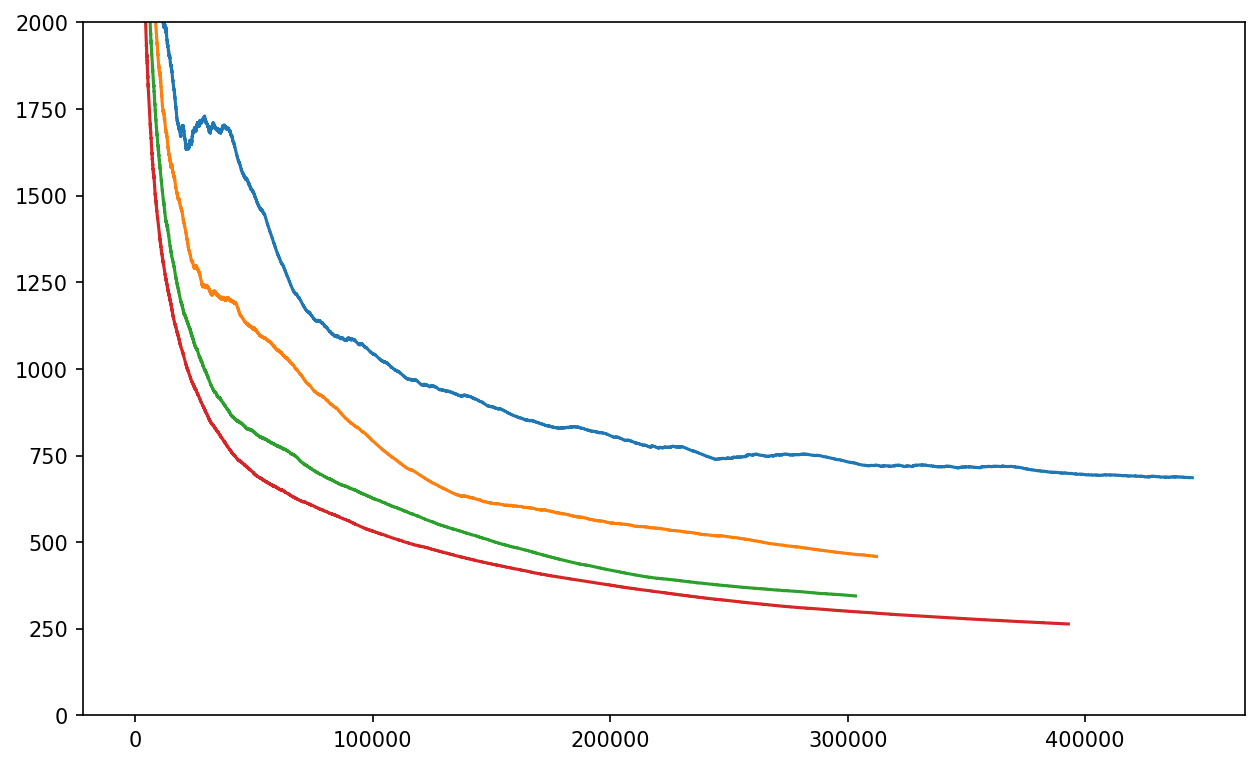

In [3]:
# aggregation_minutes = 60
dfxs = data_frame.xs("iterations_rate", axis=1)
# dfxs.index = data_frame.index // (60 * aggregation_minutes)  # Convert index from seconds to hours

fig, ax = plt.subplots(1, 1, sharey=True, figsize=(10, 6), dpi=150)
ax.set_ylim(0, 2_000)

for i, omega in enumerate(dfxs):
    # ax.set_yscale("log")
    ax.plot(dfxs[omega])


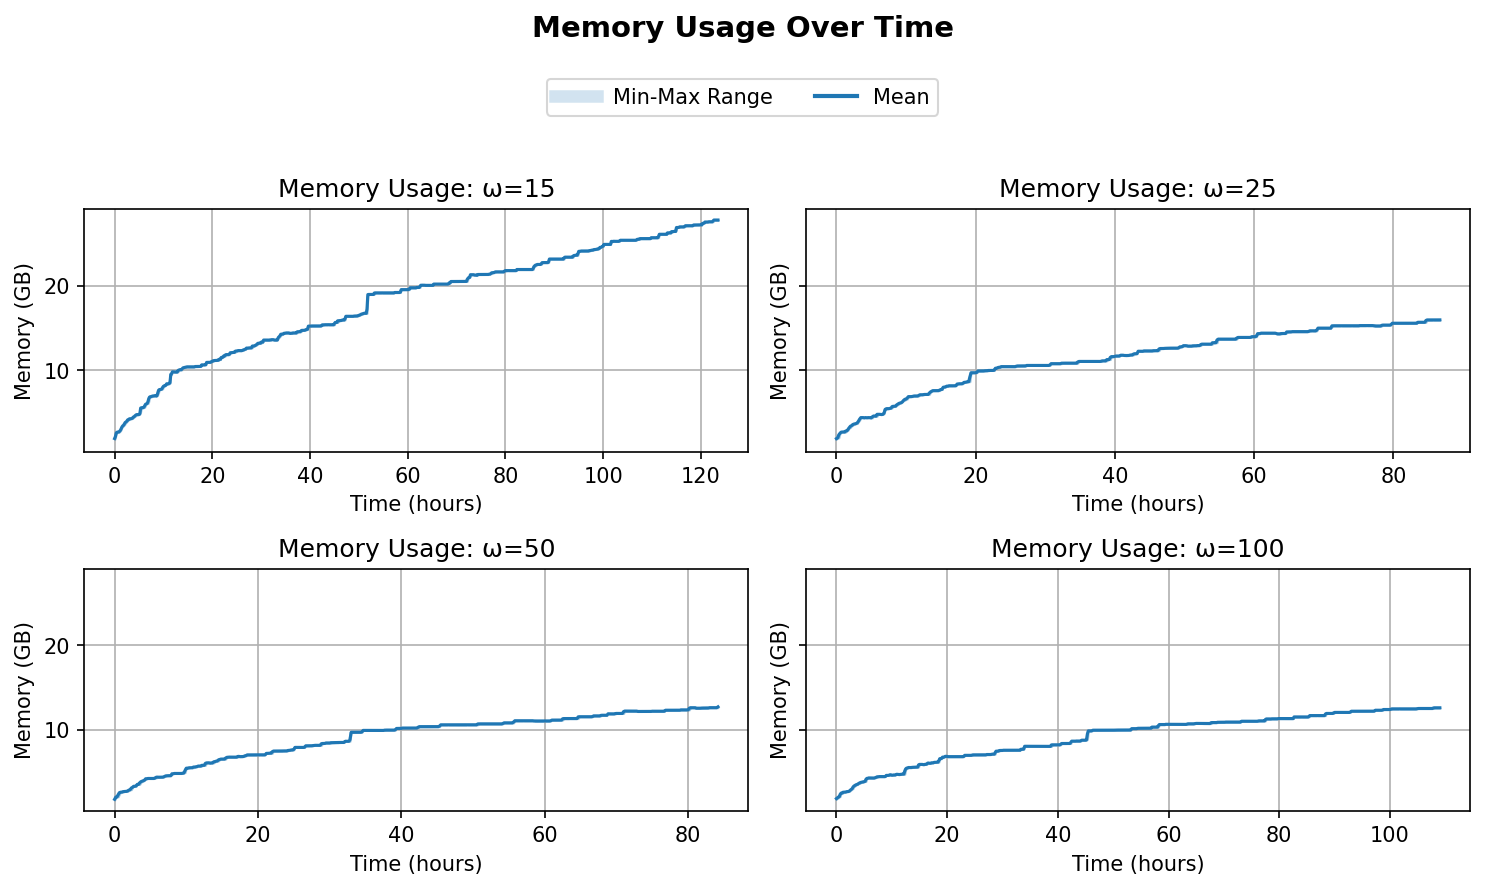

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
aggregation_minutes = 10

dfxs = data_frame.xs("memory_usage_bytes", axis=1)
dfxs /= 1e9  # Convert to GB
dfxs.index = data_frame.index // (60 * aggregation_minutes)  # Convert index from seconds to hours

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 6), dpi=150)
axs = axs.flatten()

for i, omega in enumerate(dfxs):
    ax = axs[i]
    omega_series = dfxs[omega]
    series_grouped = omega_series.groupby(omega_series.index)

    groups = np.array(list(series_grouped.groups.keys()))
    groups *= aggregation_minutes
    groups /= 60

    series_min = series_grouped.min()
    series_lower = series_grouped.quantile(.25)
    series_median = series_grouped.median()
    series_mean = series_grouped.mean()
    series_upper = series_grouped.quantile(.75)
    series_max = series_grouped.max()

    ax.fill_between(groups, series_min , series_max , alpha=0.4, color="tab:blue")
    ax.plot(groups, series_mean, color="tab:blue")

    ax.set_title(f"Memory Usage: ω={omega}")  # Subplot title
    ax.set_xlabel("Time (hours)")
    ax.grid(True)

# Format the y-axis to show values in gigabytes
for ax in axs:
    ax.set_ylabel("Memory (GB)")

# Main title
fig.suptitle("Memory Usage Over Time", fontsize=14, fontweight="bold")

# Add a single legend under the title
handles = [
    plt.Line2D([0], [0], color="tab:blue", alpha=0.2, lw=6, label="Min-Max Range"),
    plt.Line2D([0], [0], color="tab:blue", lw=2, label="Mean"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 0.92))

fig.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit title & legend
plt.show()

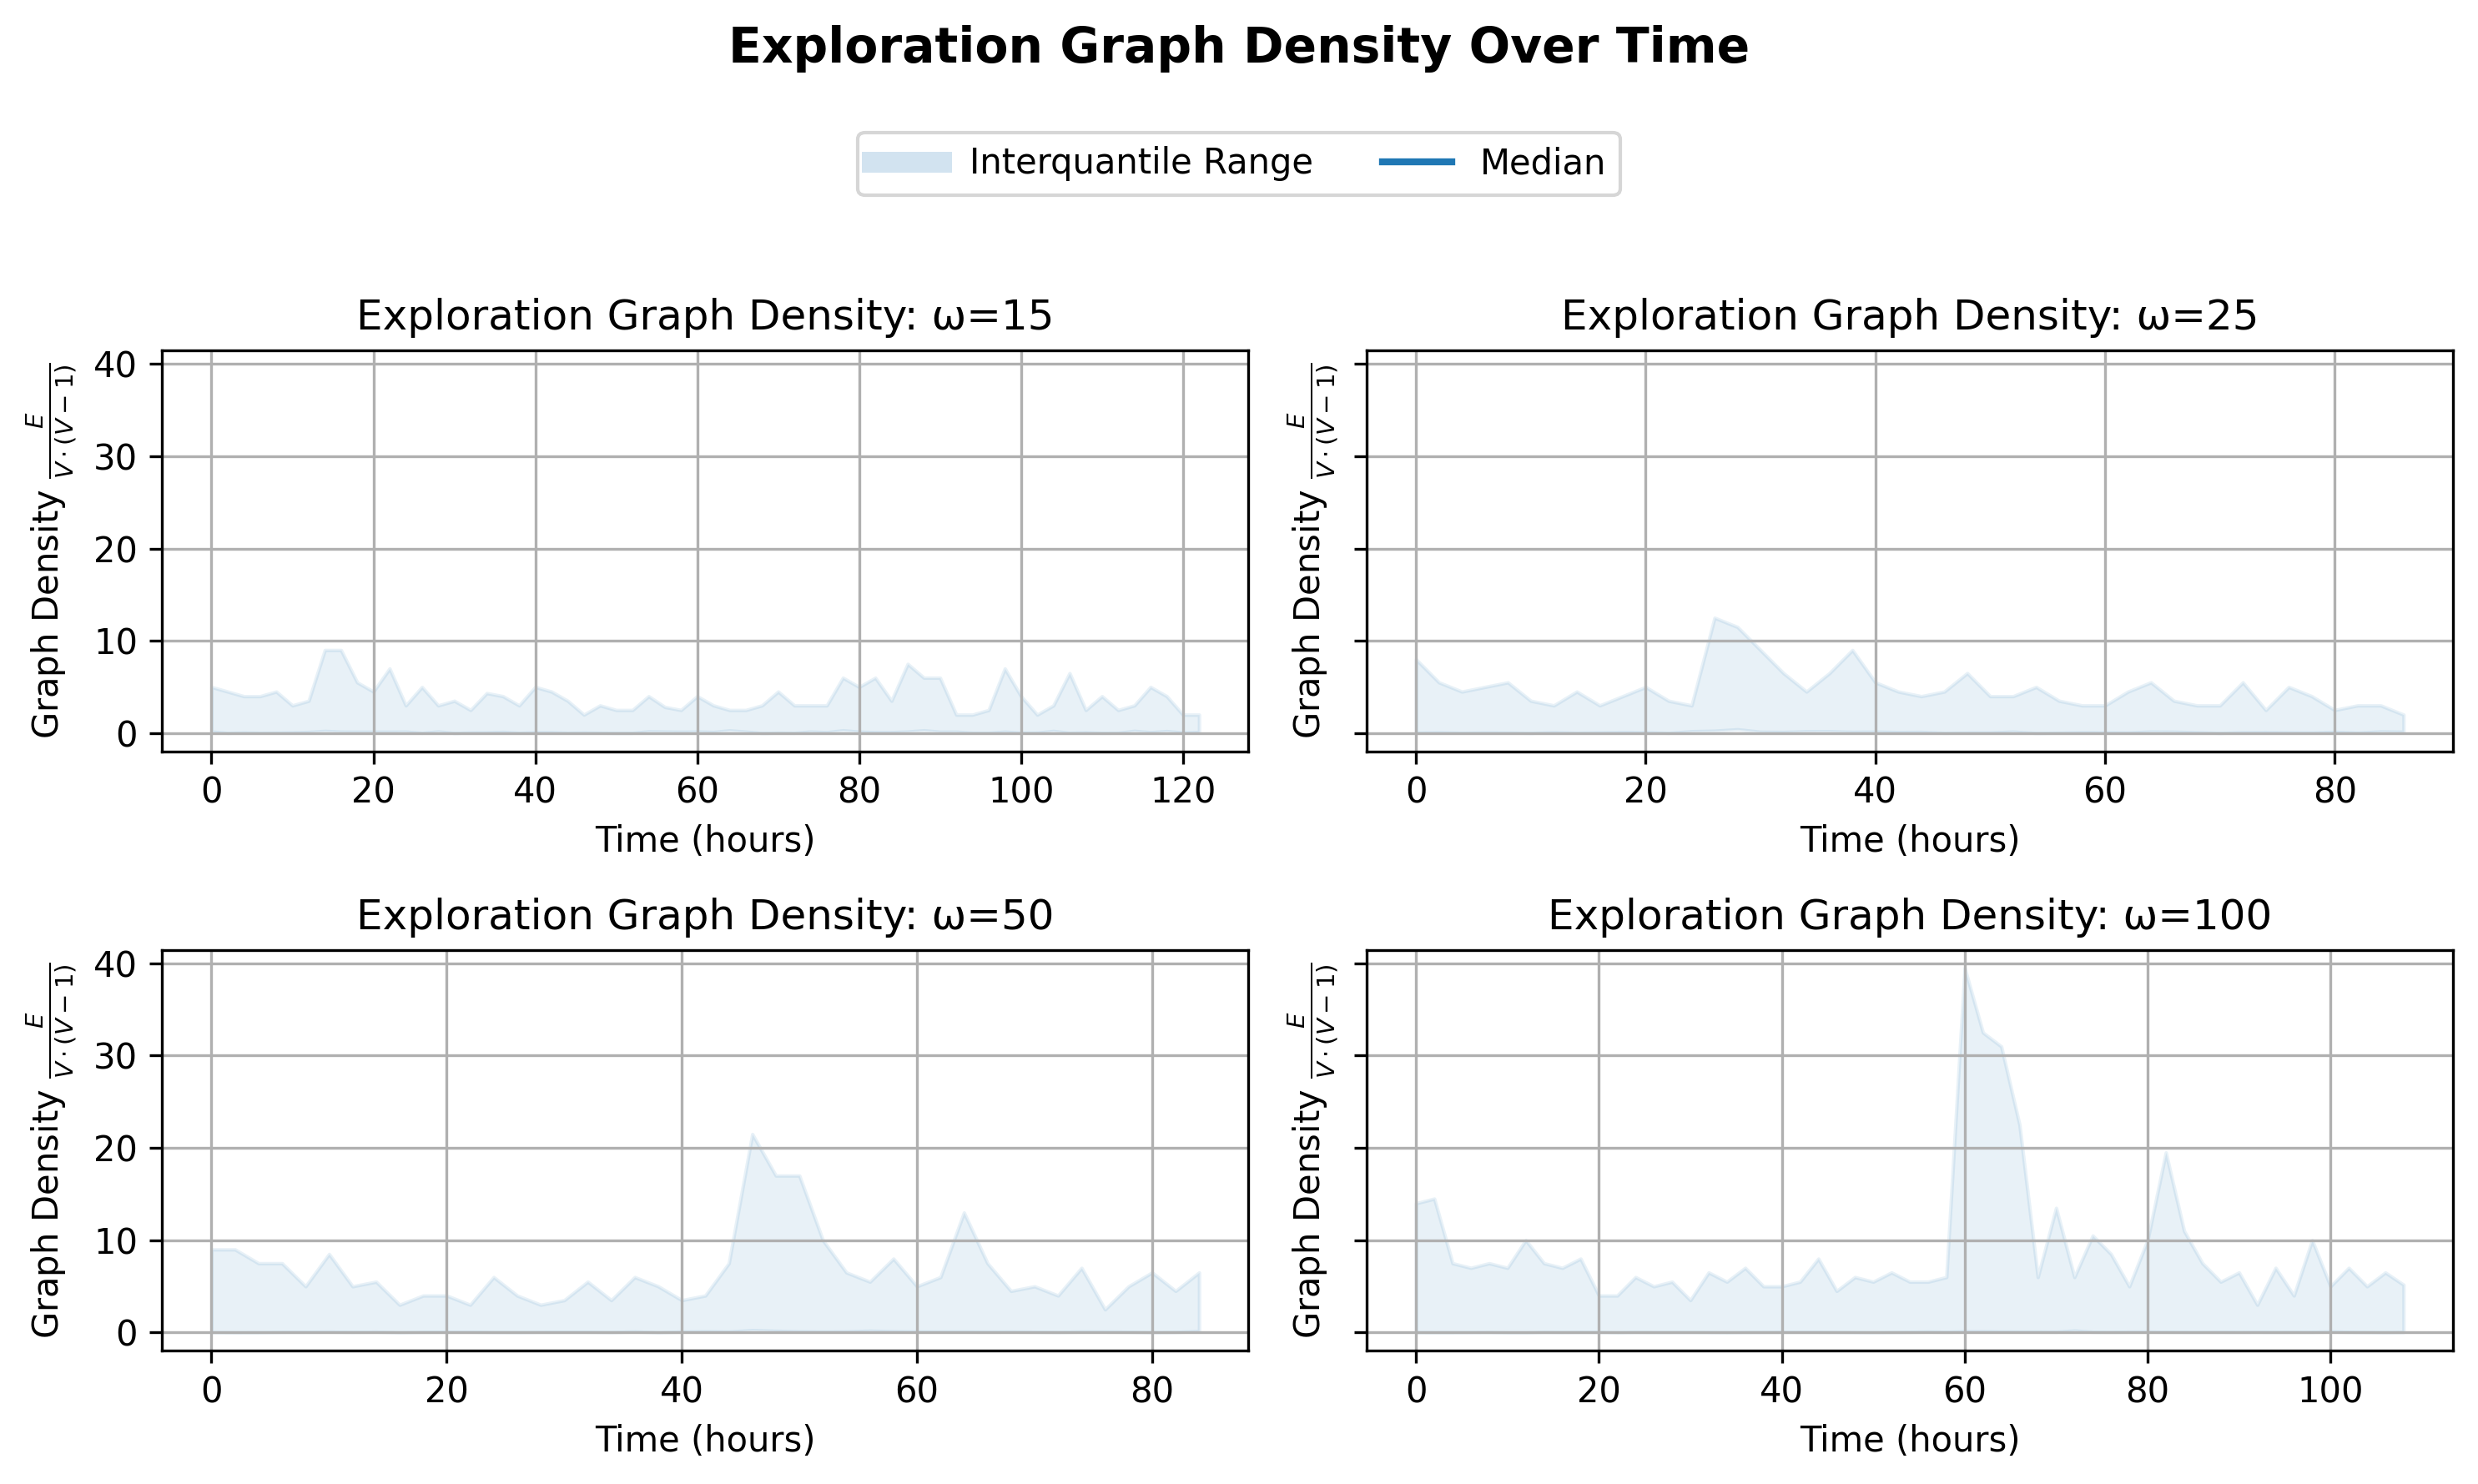

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

aggregation_minutes = 120

dfxs = data_frame.xs("graph_density", axis=1)
dfxs.index = data_frame.index // (60 * aggregation_minutes)  # Convert index from seconds to hours

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 6), dpi=300)
axs = axs.flatten()

for i, omega in enumerate(dfxs):
    ax = axs[i]
    omega_series = dfxs[omega]
    series_grouped = omega_series.groupby(omega_series.index)

    groups = np.array(list(series_grouped.groups.keys()))
    groups *= aggregation_minutes
    groups /= 60

    series_min = series_grouped.min()
    series_median = series_grouped.median()
    series_mean = series_grouped.mean()
    series_max = series_grouped.max()


    # for p in (0, 1, 5, 25,):
    for p in (1,):
        q = p / 100
        series_lower = series_grouped.quantile(q)
        series_upper = series_grouped.quantile(1 - q)
        ax.fill_between(groups, series_lower, series_max, alpha=0.1, color="tab:blue")
        # ax.plot(groups, series_lower, alpha=0.4, color="tab:blue")
        # ax.plot(groups, series_upper, alpha=0.4, color="tab:blue")
    # ax.plot(groups, series_median,  color="tab:blue")

    ax.set_title(f"Exploration Graph Density: ω={omega}")  # Subplot title
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel(r"Graph Density $\frac{E}{V\cdot(V-1)}$")
    ax.grid(True)

# Main title
fig.suptitle("Exploration Graph Density Over Time", fontsize=14, fontweight="bold")

# Add a single legend under the title
handles = [
    plt.Line2D([0], [0], color="tab:blue", alpha=0.2, lw=6, label="Interquantile Range"),
    plt.Line2D([0], [0], color="tab:blue", lw=2, label="Median"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 0.92))

fig.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit title & legend
plt.savefig("test.png")

plt.show()

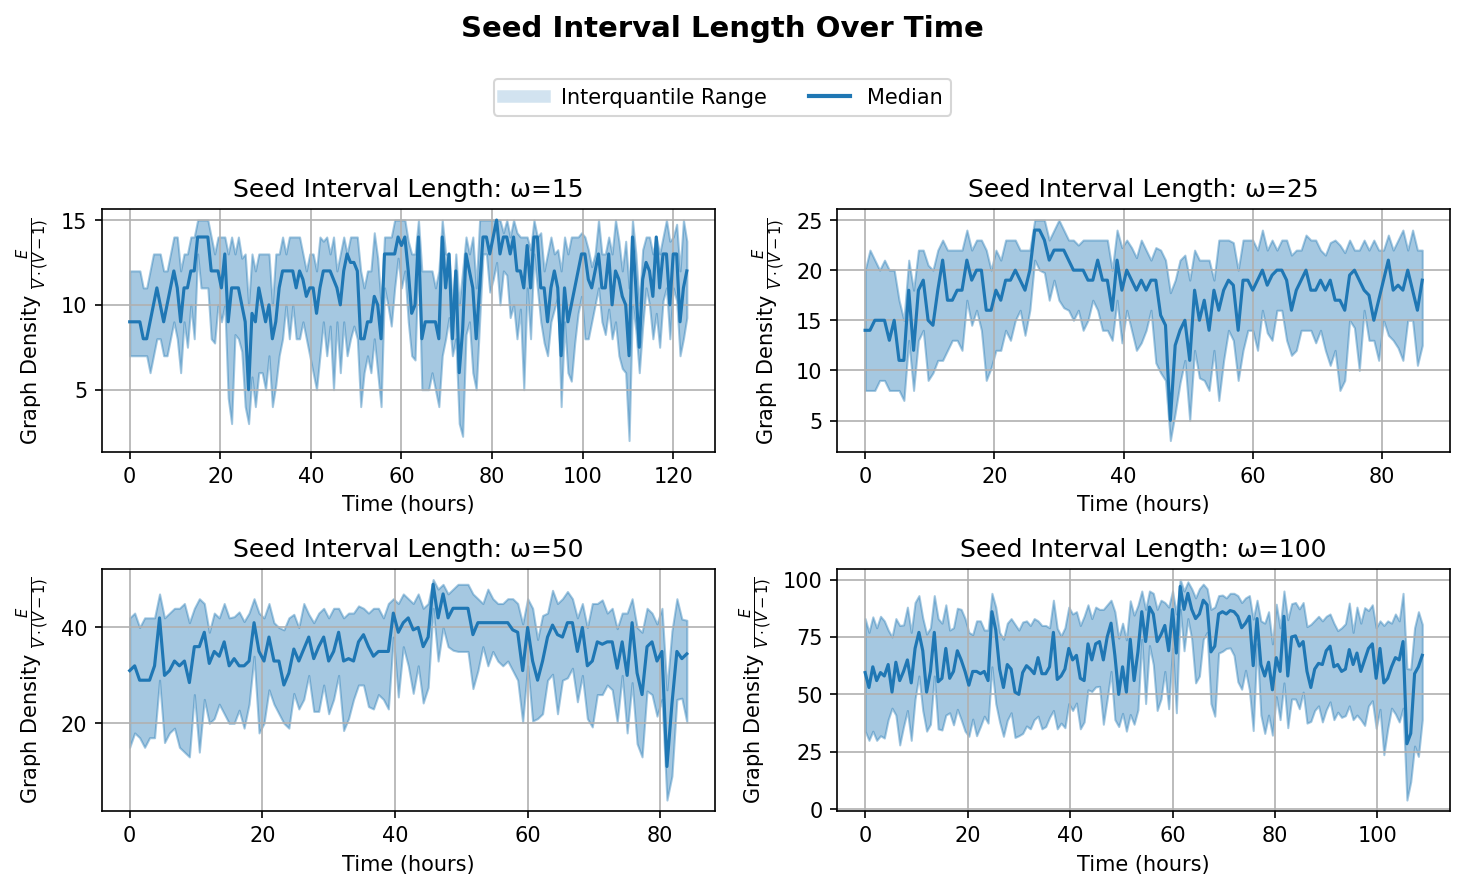

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

aggregation_minutes = 45

dfxs = data_frame.xs("seed_interval_length", axis=1)
dfxs.index = data_frame.index // (60 * aggregation_minutes)  # Convert index from seconds to hours

fig, axs = plt.subplots(2, 2, sharey=False, figsize=(10, 6), dpi=150)
axs = axs.flatten()

for i, omega in enumerate(dfxs):
    ax = axs[i]
    omega_series = dfxs[omega]
    series_grouped = omega_series.groupby(omega_series.index)

    groups = np.array(list(series_grouped.groups.keys()))
    groups *= aggregation_minutes
    groups /= 60

    series_min = series_grouped.min()
    series_lower = series_grouped.quantile(.25)
    series_median = series_grouped.median()
    series_mean = series_grouped.mean()
    series_upper = series_grouped.quantile(.75)
    series_max = series_grouped.max()


    ax.fill_between(groups, series_lower, series_upper, alpha=0.4, color="tab:blue")
    # ax.plot(groups, series_min , alpha=0.1, color="tab:blue")
    # ax.plot(groups, series_max , alpha=0.1, color="tab:blue")
    ax.plot(groups, series_median,  color="tab:blue")

    ax.set_title(f"Seed Interval Length: ω={omega}")  # Subplot title
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel(r"Graph Density $\frac{E}{V\cdot(V-1)}$")
    ax.grid(True)

# Main title
fig.suptitle("Seed Interval Length Over Time", fontsize=14, fontweight="bold")

# Add a single legend under the title
handles = [
    plt.Line2D([0], [0], color="tab:blue", alpha=0.2, lw=6, label="Interquantile Range"),
    plt.Line2D([0], [0], color="tab:blue", lw=2, label="Median"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 0.92))

fig.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit title & legend

plt.show()

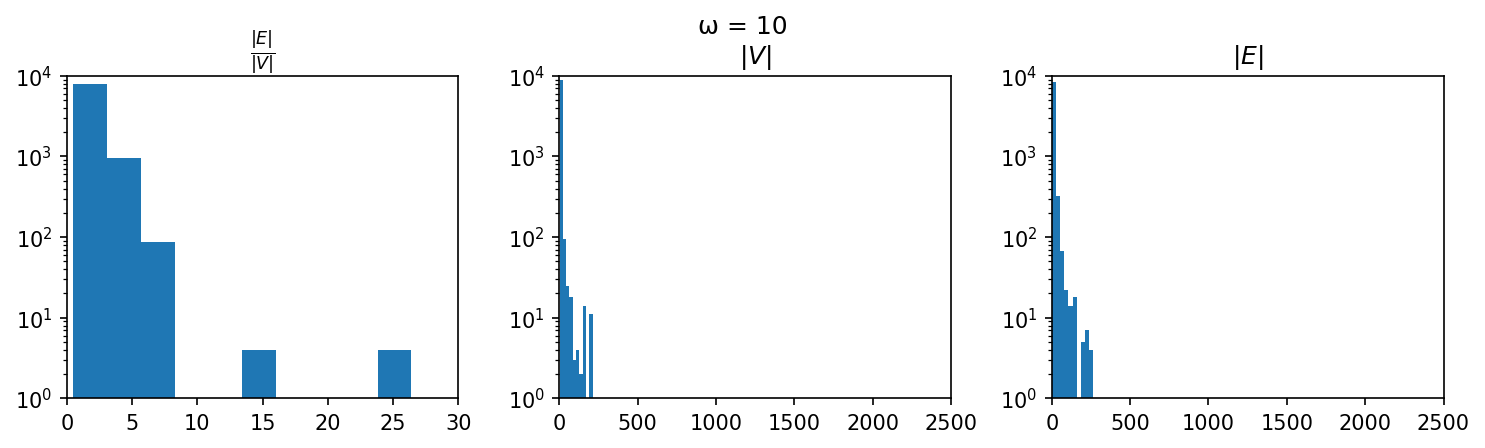

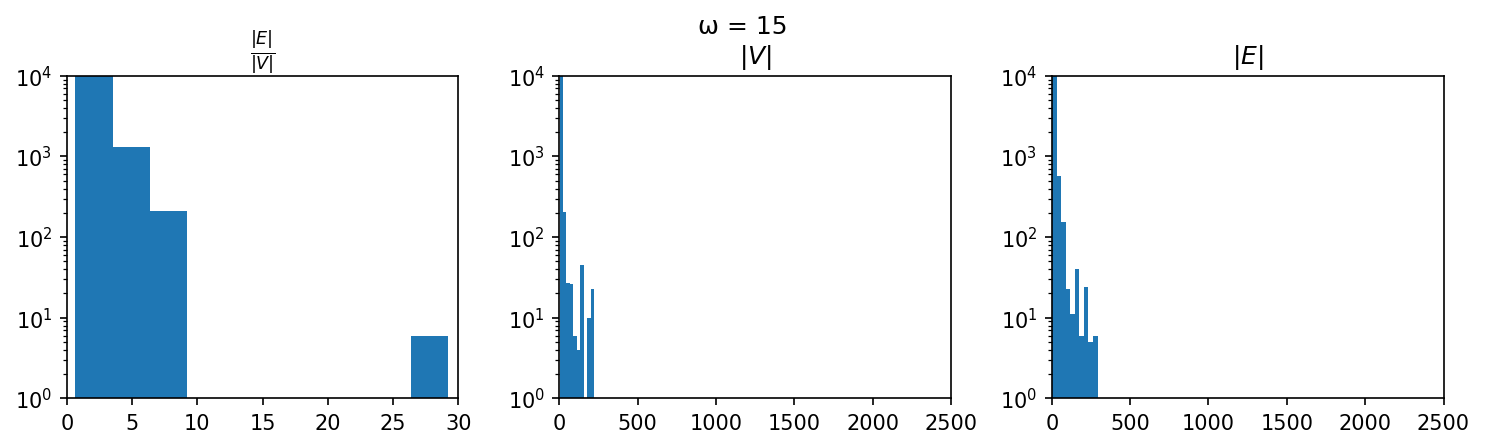

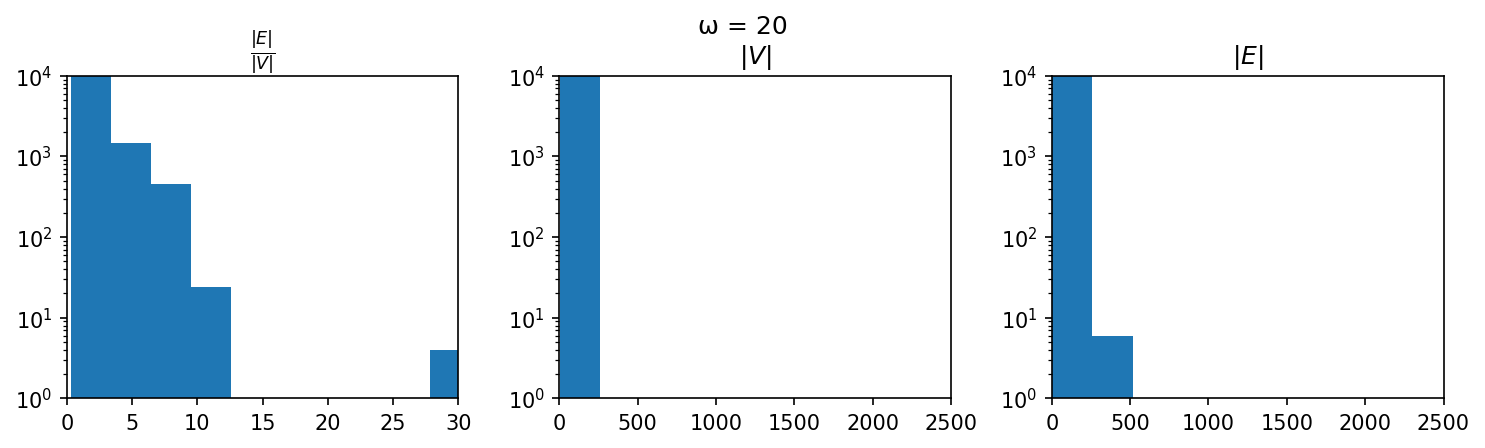

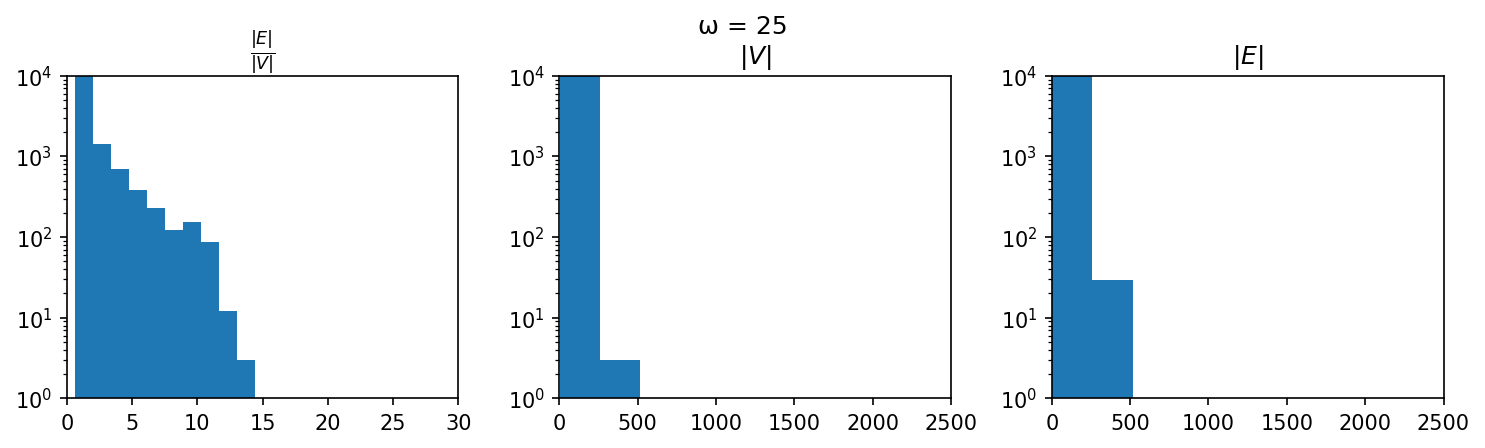

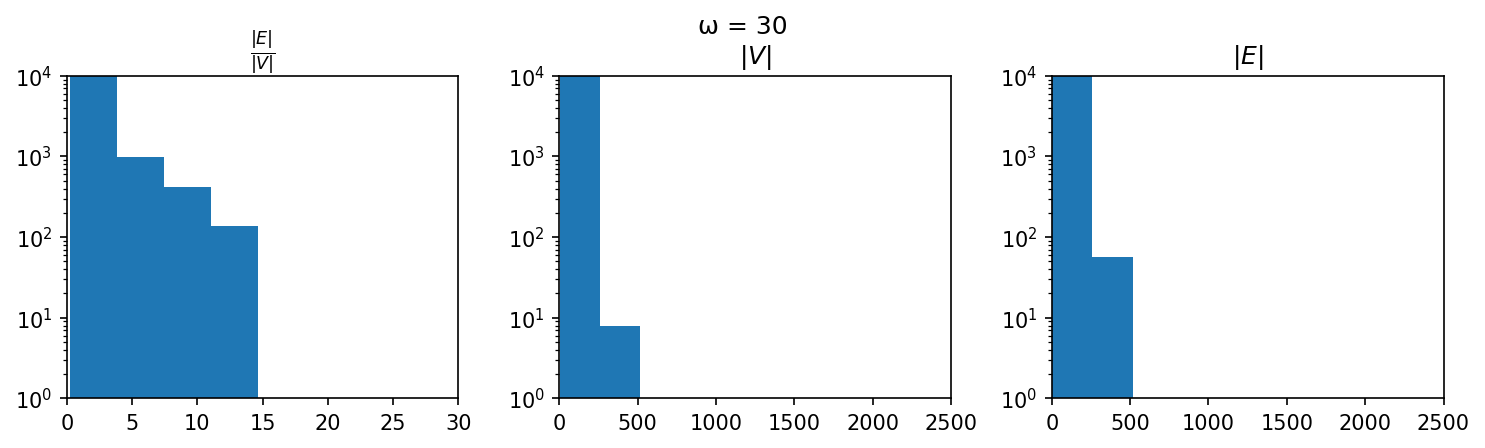

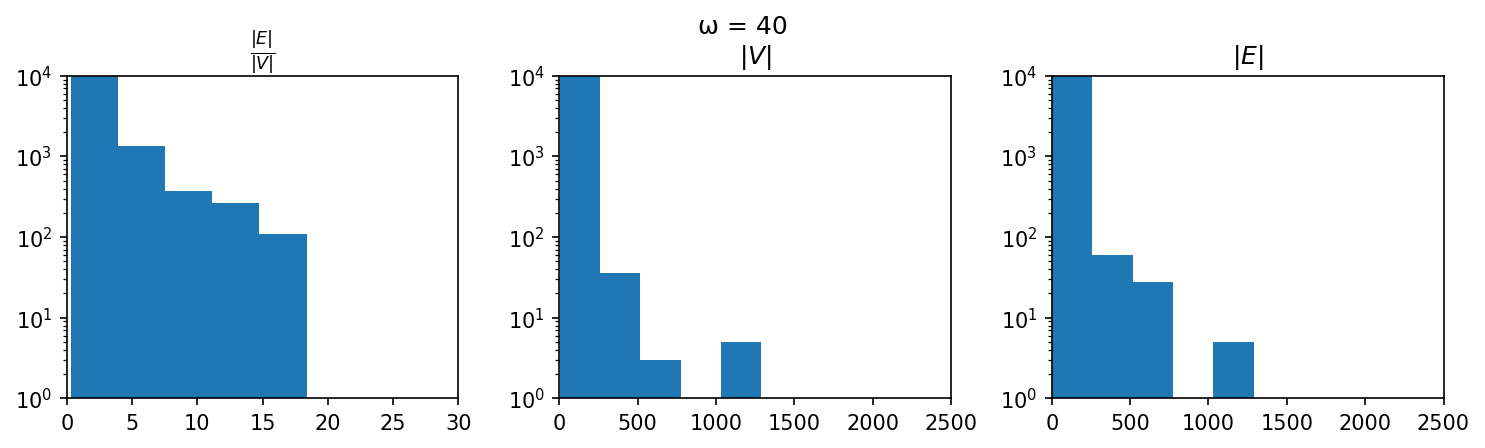

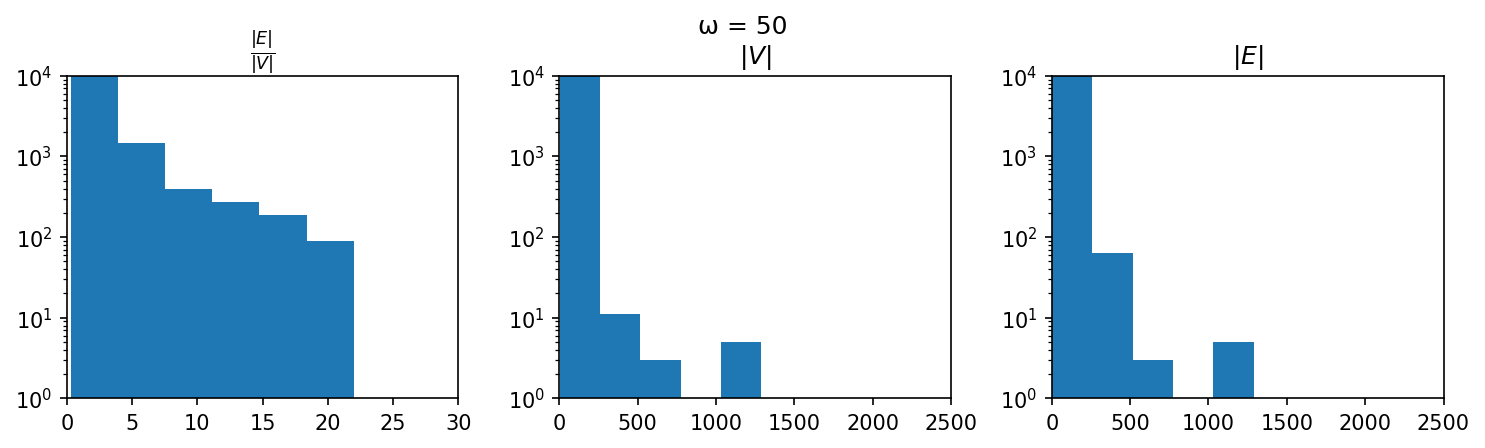

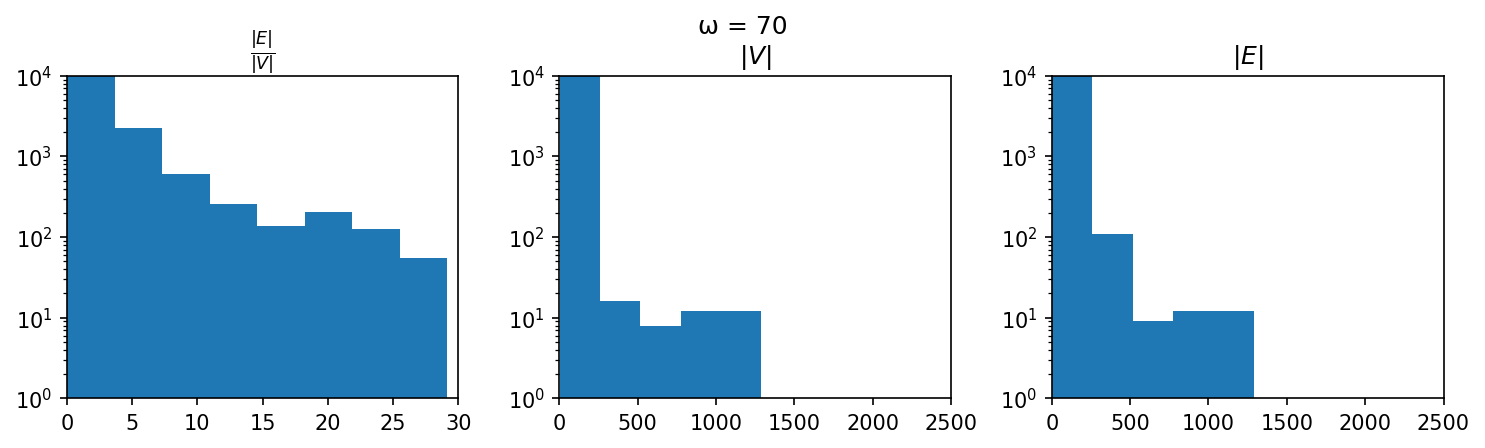

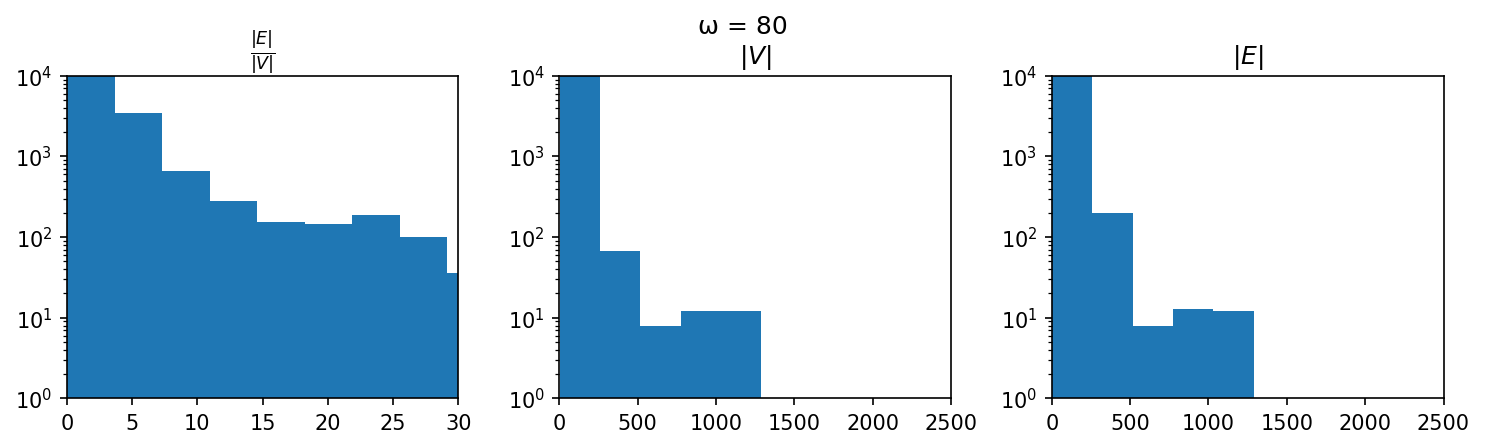

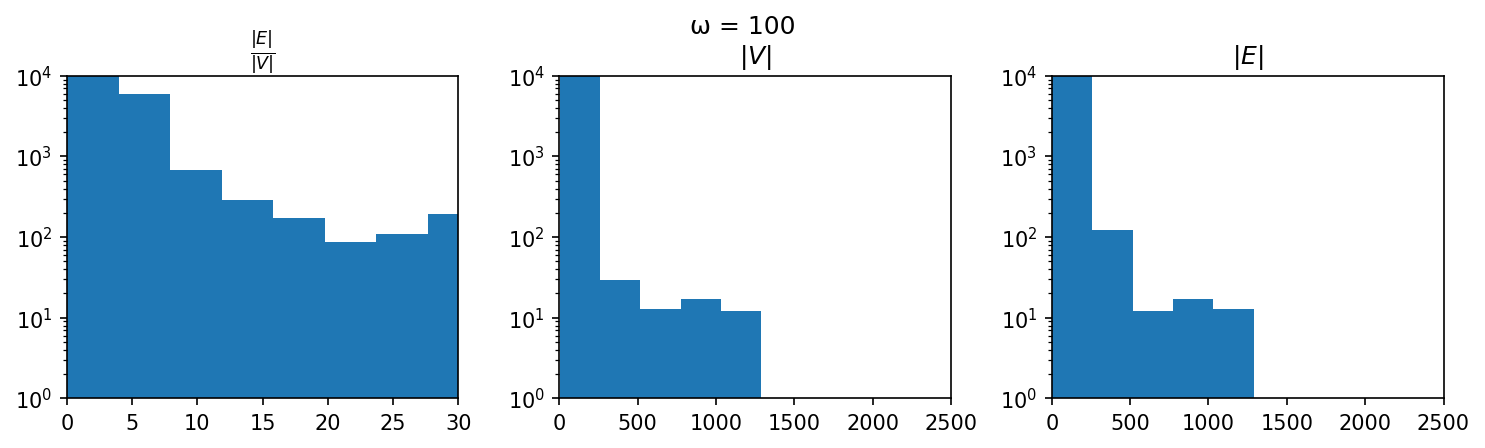

In [7]:
from pathlib import Path

q = .975

for omega in (10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 100):
    log_file = Path(f"/export/share/markusz33dm/logs/graph-size_{omega}.csv")
    if not log_file.exists():
        continue
    df = pd.read_csv(log_file)
    if df.empty:
        continue

    # Compute the 99th percentile threshold
    edge_threshold = df["number_of_edges"].quantile(q)
    node_threshold = df["number_of_nodes"].quantile(q)
    # Filter out rows above the threshold
    df_pruned = df.copy()
    # df_pruned = df_pruned[df_pruned["number_of_edges"] <= edge_threshold]
    # df_pruned = df_pruned[df_pruned["number_of_nodes"] < node_threshold]

    nodes, edges = df_pruned["number_of_nodes"], df_pruned["number_of_edges"]
    edge_node_ratio = edges / nodes

    ylim = (min(nodes.min(), edges.min()), max(nodes.max(), edges.max()))
    fig, axs = plt.subplots(ncols=3, figsize=(10, 3), dpi=150)
    axs[0].hist(edge_node_ratio)
    # axs[0].set_ylim(1, 10)
    axs[0].set_title(r"$\frac{|E|}{|V|}$")
    axs[1].hist(nodes)
    axs[1].set_title(r"$|V|$")
    # axs[1].set_ylim(ylim)

    axs[2].hist(edges)
    axs[2].set_title(r"$|E|$")

    for ax in axs:
        ax.set_yscale("log")
        ax.set_ylim(1, 10_000)
        ax.set_xlim(0, 2_500)

    axs[0].set_xlim(0, 30)

    # axs[2].set_ylim(ylim)
    fig.tight_layout()
    fig.suptitle(f"ω = {omega}")
    plt.show()
    # for col in ("graph_", "number_of_nodes", "number_of_edges")
